In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
y_train_full[0]

5

In [7]:
X_train_full[0].shape

(28, 28)

In [8]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

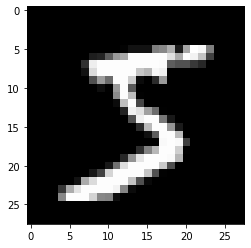

In [9]:
plt.imshow(img, cmap='gray')

In [10]:
y_train_full[0]

5

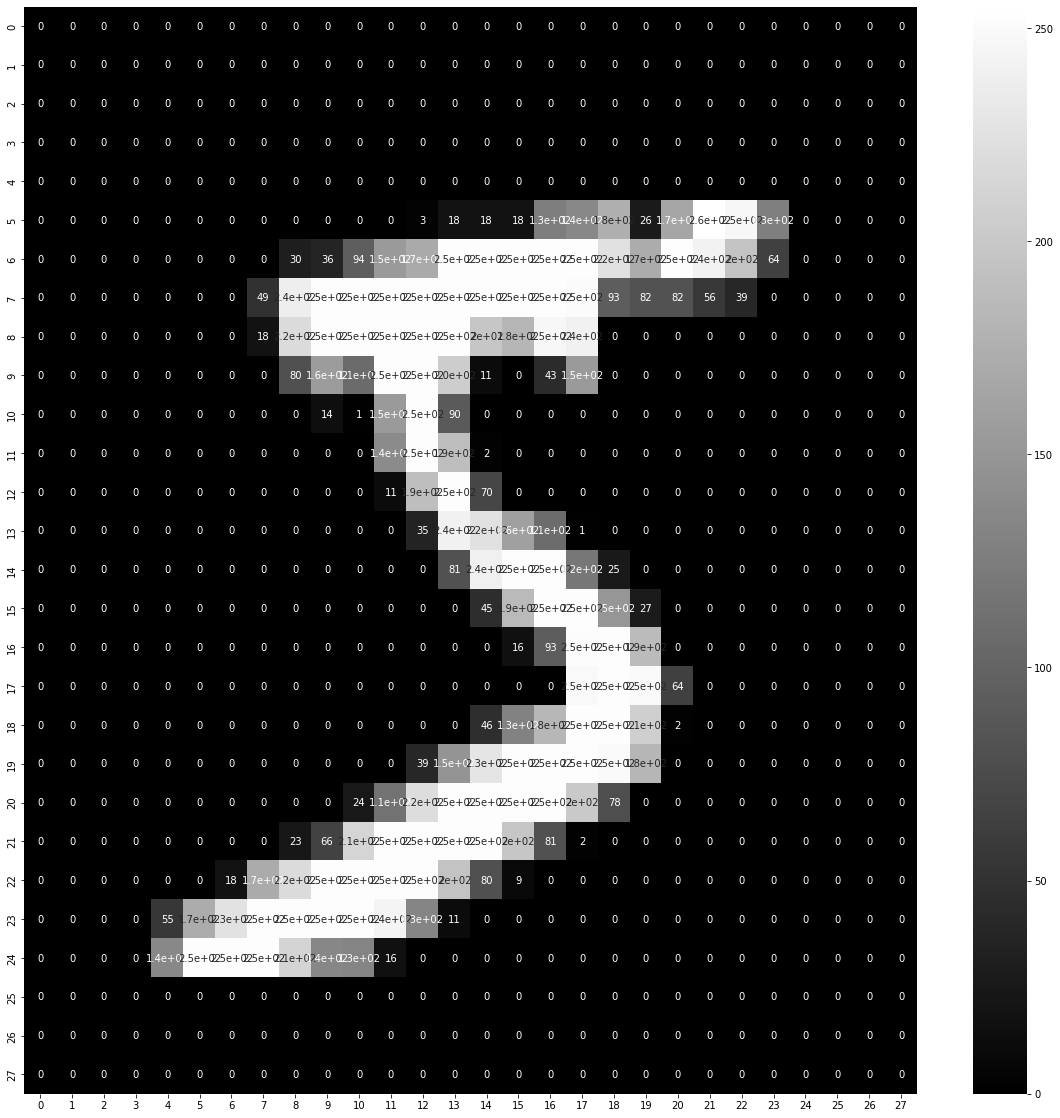

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True,cmap='gray')

In [12]:
X_valid, X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255

In [13]:
CLASSES = len(np.unique(y_train))

CLASSES

10

In [14]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation='relu', name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer02"),
    tf.keras.layers.Dense(10, activation='softmax', name="outputLayer")
]

In [15]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics = METRICS)

In [ ]:
EPOCHS = 30

VALIDATION = (X_valid,y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    validaion_data
)